# Unsupervised vs supervised learning: BBC articles classification

This project is related to the Keggle competition "BBC News Classification". All information about the dataset and the competion can be found here: https://www.kaggle.com/competitions/learn-ai-bbc

--------
Exploratory data analysis
-----------

In [222]:
# installing libraries

#%pip install pandas
#%pip install numpy
#!pip install matplotlib
#%pip install -U scikit-learn
#%pip install seaborn

In [1]:
# importing ibraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV
import time
from sklearn.metrics import RocCurveDisplay, auc
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import itertools
from sklearn.decomposition import NMF

In [2]:
# reading the data
train = pd.read_csv('BBC News Train.csv')
test = pd.read_csv('BBC News Test.csv')
solution_sample = pd.read_csv('BBC News Sample Solution.csv')

In [3]:
# some samples from training data
train.sample(20)

,ArticleId,Text,Category
646,758,qwest may spark mci bidding war us phone compa...,business
281,513,digital guru floats sub-$100 pc nicholas negro...,tech
1038,1988,tories unveil quango blitz plans plans to abol...,politics
199,559,mcilroy continues winning streak james mcilroy...,sport
585,1846,rescue hope for borussia dortmund shares in st...,business
766,982,tutu s guantanamo release call archbishop desm...,politics
1308,912,warning over tsunami aid website net users are...,tech
1059,1363,mobile multimedia slow to catch on there is no...,tech
551,2023,us data sparks inflation worries wholesale pri...,business
1190,1186,rich pickings for hi-tech thieves viruses tro...,tech


In [4]:
# some samples from test data
test.head(20)

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
5,51,lewsey puzzle over disallowed try england s jo...
6,2025,blair blasts tory spending plans tony blair ha...
7,1479,former ni minister scott dies former northern ...
8,27,career honour for actor dicaprio actor leonard...
9,397,tsunami to hit sri lanka banks sri lanka s b...


In [6]:
# some samples from solution_sample dataset
solution_sample.head(20)

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics
5,51,sport
6,2025,tech
7,1479,business
8,27,entertainment
9,397,politics


In [7]:
# number of rows and columns in training dataset
train.shape

(1490, 3)

In [8]:
# number of rows and columns in test dataset
test.shape

(735, 2)

In [9]:
# check datset for null values 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


There are no null data in the training and test dataset

Text(0.5, 0, 'Category')

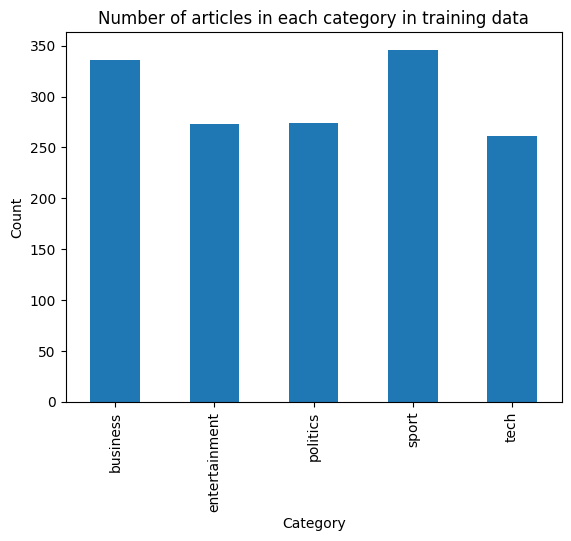

In [11]:
# plot count per category in trainng daset 
train.groupby('Category').ArticleId.count().plot.bar(ylim=0)
plt.title("Number of articles in each category in training data")
plt.ylabel('Count')
plt.xlabel('Category')

training datset is relatively balance between different categories

Text(0.5, 0, 'Number of words')

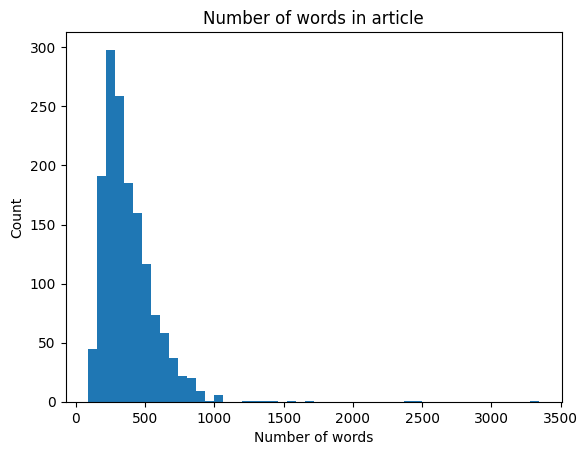

In [12]:
# plot histogram of number of words per article in training datraset
plt.hist(train.Text.astype(str).apply(lambda x: len(x.split())),bins=50)
# plt.legend(loc="upper right")
plt.title("Number of words in article")
plt.ylabel('Count')
plt.xlabel('Number of words')

the mode of the histogram of the number of words per article is about 300 words

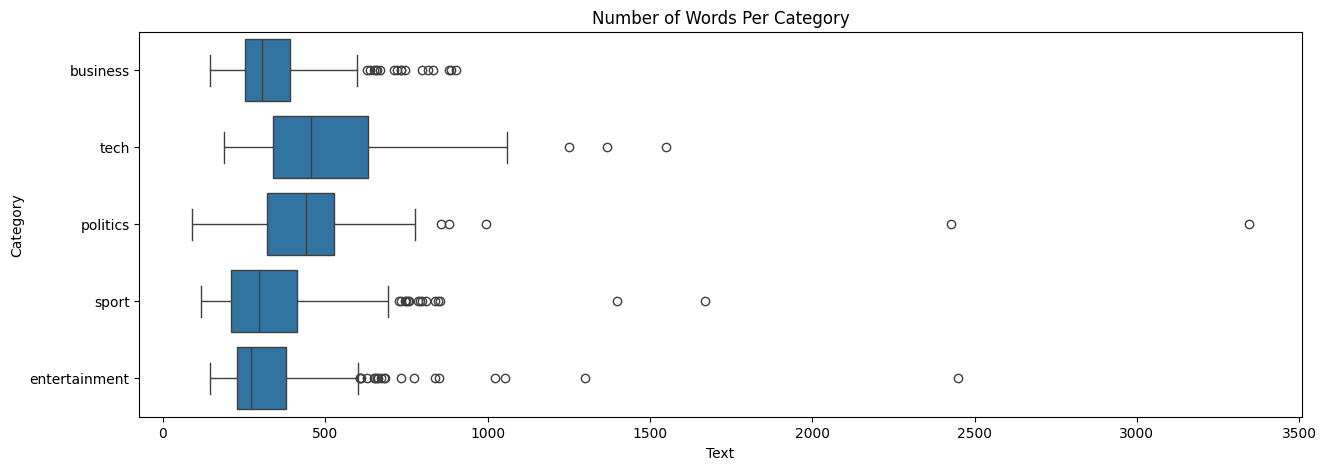

In [13]:
# plot number of words per article in each category
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(
    data = train, 
    x = train.Text.astype(str).apply(lambda x: len(x.split())), 
    y = 'Category',
    ).set(
        title = 'Number of Words Per Category');

Entertaiment and busiines have the lower average number of words, while tech has the highest

-------------
Data Cleaning
------------

To avoid extra complication, I remove all the punctuations and change all letters to lowercase in all articles in the training and test datasets



In [14]:
train['Text'] = train['Text'].str.lower()
train['Text'] = train['Text'].str.translate(str.maketrans('', '', string.punctuation))

test['Text'] = test['Text'].str.lower()
test['Text'] = test['Text'].str.translate(str.maketrans('', '', string.punctuation))

--------------
TF-IDF vectorization
--------------------
Then, I calculate a tf-idf (Term Frequency - Inverse Document Frequency) vector for each of the articles using sklearn.feature_extraction.text.TfidfVectorizer 

After some iterations on the parameters, I found that the following parameters give the best results:
- sublinear_df: True to use a logarithmic form for frequency
- min_df (minimum numbers of documents in which a word must be present, to avoid rare words): 5
- norm for the putput rows: "l2"
- encoding: "latin-1"
- ngram_range: (1, 2) indicating that we want to consider both single words and pair of words
- stop_words: "english", to remove all english common pronouns

In [15]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

train_features = tfidf.fit_transform(train.Text).toarray()
train_labels = train.Category
train_features.shape

(1490, 9817)

We have 9817 features

Some random sampling of the features, you can see that there are both single and pair words:

In [16]:
train_features_names = np.array(tfidf.get_feature_names_out())
np.random.choice(train_features_names, 20)

array(['tackle problem', 'bureaucracy', 'enable', 'specific', 'piece',
       'legal action', 'mercedes', 'david beckham', 'newspaper saying',
       'quest', 'portrayal', 'surpassed', 'book', 'predict', 'funny',
       'summer', 'published', 'porto', 'said comment', 'wouldn'],
      dtype=object)

I also transform the test datset based on the 9817 features

In [17]:
test_features = tfidf.transform(test.Text).toarray()
test_features.shape

(735, 9817)

------------
Unsupervised learing: NMF
------------

A function to find best matching label ordering based on the accuracy.

In [18]:
def label_permute_compare(ytdf,yp,n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """

    # label_string = np.unique(ytdf).tolist()
    label_string = ['business', 'tech', 'politics', 'sport', 'entertainment']

    acc_max = 0
    labelorder=[]

    for i in list(itertools.permutations([0, 1, 2, 3, 4])):
        label_int = {label: idx for idx, label in zip(i,label_string)}
        ytdf_copy = ytdf.copy()
        ytdf_copy['Category'] = ytdf_copy['Category'].map(label_int)
        acc = accuracy_score(ytdf_copy, yp)
        
        if acc > acc_max:
            acc_max = acc
            labelorder = i
    return labelorder, acc_max

training the NMF modelwith the follwoing parameters. NMF model: X = W*H

In [19]:
nmf_model = NMF(n_components=5, init='nndsvda', solver = 'mu', beta_loss = 'kullback-leibler', l1_ratio = 0.5, random_state = 42)
nmf_model.fit(train_features)
W = nmf_model.transform(train_features)
H = nmf_model.components_

inspect the dominant topic for each article by finding the largest value of each row in matrix W.

In [20]:
n_articles, n_topics = W.shape
W_sorted = np.argsort(W)
predictions = [[W_sorted[i][n_topics - 1]] for i in range(n_articles)]
yhat_train_NMF = [predictions[i][0] for i in range(n_articles)]

In [21]:
label_order, accuracy = label_permute_compare(pd.DataFrame(train, columns=['Category']), yhat_train_NMF )

print('label_order=', label_order, 'accuracy=', accuracy)

label_order= (4, 0, 2, 1, 3) accuracy= 0.9704697986577181


The accuracy on the training datset is 0.970

In [29]:
# dictionary for the categories
labels= {4:'business', 0:'tech', 2:'politics', 1:'sport', 3:'entertainment'}

transform the test dataset, predict the category and prepare the subission file for keggle

In [23]:
W = nmf_model.transform(test_features)

n_articles, n_topics = W.shape
W_sorted = np.argsort(W)
predictions = [[W_sorted[i][n_topics - 1]] for i in range(n_articles)]
yhat_test_NMF = [predictions[i][0] for i in range(n_articles)]

submission_NMF = pd.DataFrame(columns=['ArticleId', 'Category'])
submission_NMF['ArticleId'] = test['ArticleId']
submission_NMF['Category'] = yhat_test_NMF
submission_NMF['Category'] = submission_NMF['Category'].apply(lambda i: labels[i])

submission_NMF.to_csv('submission_NMF.csv', index=False)

Below is an screenshot of the score after submission: 0.962

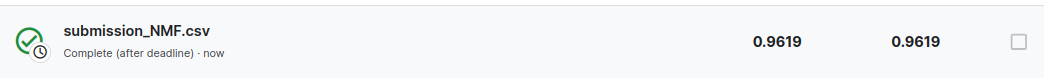

change the beta_loss to 'frobenius'

In [26]:
nmf_model = NMF(n_components=5, init='nndsvda', solver = 'mu', beta_loss = 'frobenius', l1_ratio = 0.5, random_state = 42)
nmf_model.fit(train_features)
W = nmf_model.transform(train_features)
H = nmf_model.components_
n_articles, n_topics = W.shape
W_sorted = np.argsort(W)
predictions = [[W_sorted[i][n_topics - 1]] for i in range(n_articles)]
yhat_train_NMF = [predictions[i][0] for i in range(n_articles)]
label_order, accuracy = label_permute_compare(pd.DataFrame(train, columns=['Category']), yhat_train_NMF )
print('label_order=', label_order, 'accuracy=', accuracy)

label_order= (4, 0, 2, 1, 3) accuracy= 0.9476510067114094


The accuracy on the training datset is 0.948, so lower than 'kullback-leibler' beta_loss

In [27]:
# dictionary for the categories
labels= {4:'business', 0:'tech', 2:'politics', 1:'sport', 3:'entertainment'}

In [28]:
W = nmf_model.transform(test_features)

n_articles, n_topics = W.shape
W_sorted = np.argsort(W)
predictions = [[W_sorted[i][n_topics - 1]] for i in range(n_articles)]
yhat_test_NMF = [predictions[i][0] for i in range(n_articles)]

submission_NMF = pd.DataFrame(columns=['ArticleId', 'Category'])
submission_NMF['ArticleId'] = test['ArticleId']
submission_NMF['Category'] = yhat_test_NMF
submission_NMF['Category'] = submission_NMF['Category'].apply(lambda i: labels[i])

submission_NMF.to_csv('submission_NMF_frobenius.csv', index=False)

Below is an screenshot of the score after submission: 0.947, so lower than 'kullback-leibler' beta_loss

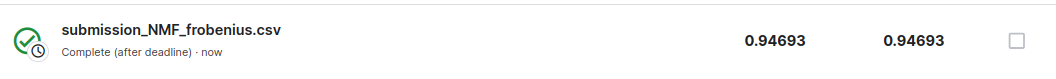

training on 50% of training datset (745 samples) using 'kullback-leibler' beta_loss

In [32]:
idx = np.random.choice(np.arange(len(train_features)), 745, replace=False)
train_features_50 = train_features[idx]
train_labels_50 = train_labels[idx]

nmf_model_50 = NMF(n_components=5, init='nndsvda', solver = 'mu', beta_loss = 'kullback-leibler', l1_ratio = 0.5, random_state = 42)
nmf_model_50.fit(train_features_50)
W = nmf_model_50.transform(train_features_50)
H = nmf_model_50.components_
n_articles, n_topics = W.shape
W_sorted = np.argsort(W)
predictions = [[W_sorted[i][n_topics - 1]] for i in range(n_articles)]
yhat_train_NMF = [predictions[i][0] for i in range(n_articles)]
label_order, accuracy = label_permute_compare(pd.DataFrame(train.iloc[idx], columns=['Category']), yhat_train_NMF )
print('label_order=', label_order, 'accuracy=', accuracy)

label_order= (3, 2, 0, 1, 4) accuracy= 0.9610738255033557


The accuracy on the training datset is 0.961, which is slightly reduced compared to the training on full trainng datset

In [34]:
# dictionary for the categories
labels= {3:'business', 2:'tech', 0:'politics', 1:'sport', 4:'entertainment'}

In [35]:
W = nmf_model_50.transform(test_features)

n_articles, n_topics = W.shape
W_sorted = np.argsort(W)
predictions = [[W_sorted[i][n_topics - 1]] for i in range(n_articles)]
yhat_test_NMF = [predictions[i][0] for i in range(n_articles)]

submission_NMF = pd.DataFrame(columns=['ArticleId', 'Category'])
submission_NMF['ArticleId'] = test['ArticleId']
submission_NMF['Category'] = yhat_test_NMF
submission_NMF['Category'] = submission_NMF['Category'].apply(lambda i: labels[i])

submission_NMF.to_csv('submission_NMF_50.csv', index=False)

Below is an screenshot of the score after submission: 0.947, which is slightly reduced compared to the training on full trainng datset

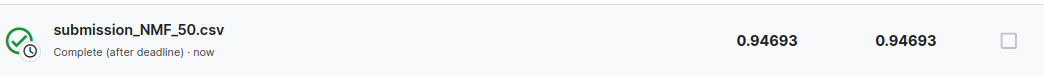

training on 10% of training datset (149 samples) using 'kullback-leibler' beta_loss

In [37]:
idx = np.random.choice(np.arange(len(train_features)), 149, replace=False)
train_features_10 = train_features[idx]
train_labels_10 = train_labels[idx]

nmf_model_10 = NMF(n_components=5, init='nndsvda', solver = 'mu', beta_loss = 'kullback-leibler', l1_ratio = 0.5, random_state = 42)
nmf_model_10.fit(train_features_10)
W = nmf_model_10.transform(train_features_10)
H = nmf_model_10.components_
n_articles, n_topics = W.shape
W_sorted = np.argsort(W)
predictions = [[W_sorted[i][n_topics - 1]] for i in range(n_articles)]
yhat_train_NMF = [predictions[i][0] for i in range(n_articles)]
label_order, accuracy = label_permute_compare(pd.DataFrame(train.iloc[idx], columns=['Category']), yhat_train_NMF )
print('label_order=', label_order, 'accuracy=', accuracy)

label_order= (0, 4, 1, 2, 3) accuracy= 0.5637583892617449


The accuracy on the training datset is 0.564, which is significantly reduced compared to the training on full trainng datset

In [38]:
# dictionary for the categories
labels= {0:'business', 4:'tech', 1:'politics', 2:'sport', 3:'entertainment'}

In [39]:
W = nmf_model_10.transform(test_features)

n_articles, n_topics = W.shape
W_sorted = np.argsort(W)
predictions = [[W_sorted[i][n_topics - 1]] for i in range(n_articles)]
yhat_test_NMF = [predictions[i][0] for i in range(n_articles)]

submission_NMF = pd.DataFrame(columns=['ArticleId', 'Category'])
submission_NMF['ArticleId'] = test['ArticleId']
submission_NMF['Category'] = yhat_test_NMF
submission_NMF['Category'] = submission_NMF['Category'].apply(lambda i: labels[i])

submission_NMF.to_csv('submission_NMF_10.csv', index=False)

Below is an screenshot of the score after submission: 0.611, which is slightly reduced compared to the training on full trainng datset

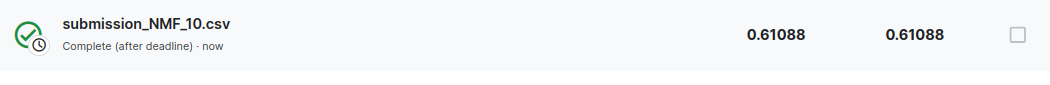

------------
Supervised learing: Support vector machine
------------

As the supervised algorithm, I chose SVM. First I do a grid search on C parameter to find the best value (using cross validation method)

In [ ]:
#### performing grid search on number of estimators and learning rate
clf_SVM = SVC()
params = {
    'C': np.logspace(-5, 5, num=11, endpoint=True, base=2.0, dtype=None, axis=0),
}

grid_SVM = GridSearchCV(estimator=clf_SVM,param_grid=params, cv=3).fit(train_features, train_labels)

In [154]:
print('Best parameters: ', grid_SVM.best_params_)
print('best score: ', grid_SVM.best_score_)

Best parameters:  {'C': 2.0}
best score:  0.973156141147963


The best model is with C=2 with the score of 0.973 on the training datset (cv=3)

In [26]:
# predict training categories

clf_SVM = SVC(C=2.0)
clf_SVM.fit(train_features, train_labels)
yhat_SVM = clf_SVM.predict(test_features)

In [29]:
# create submission file
submission_svm = pd.DataFrame(columns=['ArticleId', 'Category'])
submission_svm['ArticleId'] = test['ArticleId']
submission_svm['Category'] = yhat_SVM
submission_svm.to_csv('submission_svm.csv', index=False)

Below is an screenshot of the score after submission: 0.985

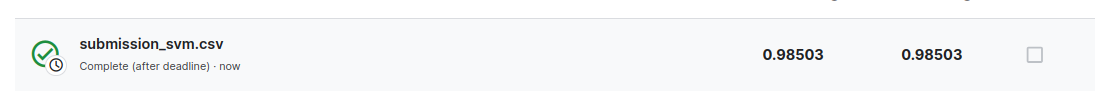

I repeat the same but this time using 50% (745 samples) of the training dataset

In [32]:
idx = np.random.choice(np.arange(len(train_features)), 745, replace=False)
train_features_50 = train_features[idx]
train_labels_50 = train_labels[idx]

clf_SVM = SVC(C=2.0)
clf_SVM.fit(train_features_50, train_labels_50)
yhat_SVM_50 = clf_SVM.predict(test_features)

In [33]:
# create submission file
submission_svm_50 = pd.DataFrame(columns=['ArticleId', 'Category'])
submission_svm_50['ArticleId'] = test['ArticleId']
submission_svm_50['Category'] = yhat_SVM_50
submission_svm_50.to_csv('submission_svm_50.csv', index=False)

Below is an screenshot of the score (training on 50% of data) after submission: 0.973

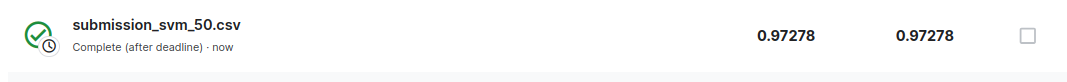

I repeat the same but this time using 10% (149 samples) of the training dataset

In [35]:
idx = np.random.choice(np.arange(len(train_features)), 149, replace=False)
train_features_10 = train_features[idx]
train_labels_10 = train_labels[idx]

clf_SVM = SVC(C=2.0)
clf_SVM.fit(train_features_10, train_labels_10)
yhat_SVM_10 = clf_SVM.predict(test_features)

In [37]:
# create submission file
submission_svm_10 = pd.DataFrame(columns=['ArticleId', 'Category'])
submission_svm_10['ArticleId'] = test['ArticleId']
submission_svm_10['Category'] = yhat_SVM_10
submission_svm_10.to_csv('submission_svm_10.csv', index=False)

Below is an screenshot of the score (training on 10% of data) after submission: 0.853

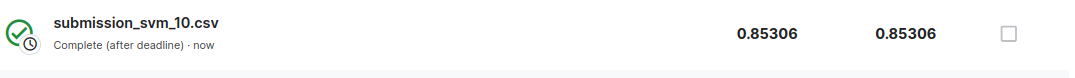

----------------------
Conclusion
-----------------------

| Model | unsup. NMF | unsup. NMF (50% datset) | unsup. NMF (10% datset) | sup. SVM | sup. SVM (50% datset)| sup. SVM  (10% datset)|
| --- | --- | --- | --- |--- | --- |--- |
| Accuracy on test dataset:| 0.962 | 0.947 | 0.611 |0.985 | 0.973 | 0.853 |



Above is a table comparison of different models on the test dataset. 

The results show that, with the full datset, both unsupervised NMF and supervised SVM models had realtively high accuracy (>0.95). Also, in general, as the number of the trainng datset reduces the accuracy of both unsupervised MNF and supervised MNF models reduces, but the reduction is not very significant until lower than 50% of the original datset.

In addition, the supervised SVM model had better performance compared to he NMF unsupervised model, especially when the number of training dataset was reduced significantly. This shows that the supervised model has a better data-efficiency compared to the unsupervised model. but the difference between the two models decreseas as the number of the traing data increases, potentially due to the negative effects of overfitting in the supervised model.

Both models (especially the unsupervised NMF model) can be improved by further hyperparameter tuning.

